<a href="https://colab.research.google.com/github/antussa2016/thesis_work/blob/master/data_analysis/analysing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/antussa2016/thesis_work


Cloning into 'thesis_work'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 57 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (57/57), 248.45 KiB | 4.52 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('thesis_work/dataset/main_dataset.csv')

In [ ]:
df.head(2)

,twitter_id,stackoverflow_id,location,question_count,answer_count,reputation,top_tags_answers,top_tags_question,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
0,10F1,145587,"['Louisiana, USA']",13,500,74297,"['go', 'json', 'http', 'goroutine', 'struct', ...","['go', 'javascript', 'python', 'c++', 'linux',...",0.839299,0.170988,0.083984,0.047367,0.612101,0.068207,0.487871,0.294548,0.349292,0.393112
1,1tgr,32133,['London'],33,500,48461,"['c#', '.net', 'f#', 'winforms', 'generics', '...","['rust', 'f#', '.net', 'python', 'c#', 'pandas...",0.849555,0.100009,0.032557,0.001654,0.392036,0.005144,0.303714,0.103960,0.253416,0.167264


In [ ]:
#deleting extra columns

In [ ]:
df.drop(columns=['location','Conservation','Openness to change','Hedonism','Self-enhancement','Self-transcendence'], inplace=True)

In [ ]:
df.head(1)

,twitter_id,stackoverflow_id,question_count,answer_count,reputation,top_tags_answers,top_tags_question,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range
0,10F1,145587,13,500,74297,"['go', 'json', 'http', 'goroutine', 'struct', ...","['go', 'javascript', 'python', 'c++', 'linux',...",0.839299,0.170988,0.083984,0.047367,0.612101


In [ ]:
#renameing coumn

In [ ]:
df.rename(columns={'Emotional range': 'Neuroticism'}, inplace=True)

In [ ]:
df.rename(columns={'top_tags_answers': 'answer_tag','top_tags_question': 'question_tag'}, inplace=True)

In [ ]:
df.head(1)

,twitter_id,stackoverflow_id,question_count,answer_count,reputation,answer_tag,question_tag,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,10F1,145587,13,500,74297,"['go', 'json', 'http', 'goroutine', 'struct', ...","['go', 'javascript', 'python', 'c++', 'linux',...",0.839299,0.170988,0.083984,0.047367,0.612101


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   twitter_id         819 non-null    object 
 1   stackoverflow_id   819 non-null    int64  
 2   question_count     819 non-null    int64  
 3   answer_count       819 non-null    int64  
 4   reputation         819 non-null    int64  
 5   answer_tag         819 non-null    object 
 6   question_tag       819 non-null    object 
 7   Openness           819 non-null    float64
 8   Conscientiousness  819 non-null    float64
 9   Extraversion       819 non-null    float64
 10  Agreeableness      819 non-null    float64
 11  Neuroticism        819 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 76.9+ KB


In [ ]:
df['answer_tag'] = df['answer_tag'].tolist()

In [ ]:
df['question_tag'] = df['question_tag'].tolist()

In [ ]:
df.head(1)

,twitter_id,stackoverflow_id,question_count,answer_count,reputation,answer_tag,question_tag,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,10F1,145587,13,500,74297,"['go', 'json', 'http', 'goroutine', 'struct', ...","['go', 'javascript', 'python', 'c++', 'linux',...",0.839299,0.170988,0.083984,0.047367,0.612101


In [ ]:
df['tags'] = df['answer_tag'] + df['question_tag']
df['tags'] = [value.replace('][', ',') for value in df['tags']]

In [ ]:

import ast

In [ ]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):

        L.append(i)

    return L

In [ ]:
df['tags'] = df['tags'].apply(convert)

In [ ]:
df['tags'][0]

In [ ]:
#finding most common tags

In [ ]:
type(df['tags'][0])

list

In [ ]:
import pandas as pd
from collections import Counter

# Example DataFrame with a 1D 'tags' array


# Set the number of preferred tags (1, 2, or 3)
num_preferred_tags = 3

# Clean and process tags, then select preferred tag
frequent_tag = []
for tag in df['tags']:
    #tags_list = tag.sum()  # Flatten the 1D array of tags
    tag_frequencies = Counter(tag)
    preferred_tags = [tag for tag, _ in tag_frequencies.most_common(num_preferred_tags)]
    frequent_tag.append(preferred_tags)

# Create separate columns for each preferred tag


df1 = pd.DataFrame(frequent_tag, columns=["preferred_tags1", "preferred_tags2","preferred_tags3"])

In [ ]:
df1["preferred_tags1"].value_counts().head(60)


In [ ]:
df1["preferred_tags2"].value_counts().head(60)

In [ ]:
df1["preferred_tags3"].value_counts().head(60)

In [ ]:
for i in df1["preferred_tags3"]:
    print(i)

In [ ]:
df1.head(50)

,preferred_tags1,preferred_tags2,preferred_tags3
0,go,javascript,json
1,c#,.net,f#
2,c++,python,javascript
3,c#,java,.net
4,c#,ruby,.net
5,javascript,reactjs,ruby
6,c#,.net,ms-word
7,python,c++,javascript
8,android,material-components-android,material-components
9,c++,objective-c,templates


In [ ]:
df1['tags'] = df1.apply(lambda row: ', '.join([f"'{tag}'" for tag in [row['preferred_tags1'], row['preferred_tags2'], row['preferred_tags3']]]), axis=1)

In [ ]:
df1['tags'][0]

"'go', 'javascript', 'json'"

In [ ]:
import ast

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):

        L.append(i)

    return L

In [ ]:
df1['tags'] = df1['tags'].apply(convert)

In [ ]:
import pandas as pd
from collections import Counter

all_tags = [tag for tag_list in df1['tags'] for tag in tag_list]

# Count tag occurrences
tag_frequencies = Counter(all_tags)

# Find uncommon tags (occurrence = 1)
uncommon_tags = [tag for tag, count in tag_frequencies.items() if count == 1]

print("All tags:", all_tags)
print("Uncommon tags:", uncommon_tags)







All tags: ['go', 'javascript', 'json', 'c#', '.net', 'f#', 'c++', 'python', 'javascript', 'c#', 'java', '.net', 'c#', 'ruby', '.net', 'javascript', 'reactjs', 'ruby', 'c#', '.net', 'ms-word', 'python', 'c++', 'javascript', 'android', 'material-components-android', 'material-components', 'c++', 'objective-c', 'templates', 'c++', 'multithreading', 'linux', 'r', 'function', 'shiny', 'r', 'xts', 'quantmod', 'python', 'pandas', 'numpy', 'swift', 'ios', 'objective-c', 'sql-server', 'sql-server-2008', 'sql', 'java', 'python', 'scheme', 'powershell', 'regex', 'windows', 'vba', 'excel', 'userform', 'c#', '.net', 'tfs', 'c#', '.net', 'ruby-on-rails', 'python', 'numpy', 'algorithm', 'c++', 'c++11', 'language-lawyer', 'javascript', 'c++', 'winapi', 'sql', 'sql-server', 'sql-server-2005', 'r', 'plot', 'ggplot2', 'javascript', 'html', 'css', 'c#', 'sql-server', '.net', 'sql-server', 'sql-server-2008', 'sql', 'python', 'list', 'string', 'php', 'mysql', 'sql', 'objective-c', 'git', 'xcode', 'c++', 'c+

In [ ]:
all_tags = [tag for tag_list in df1['tags'] for tag in tag_list]

# Count tag occurrences
tag_frequencies = Counter(all_tags)

# Find common tags (occurrence > 1)
common_tags = [tag for tag, count in tag_frequencies.items() if count > 1]

print("All tags:", all_tags)
print("Common tags:", common_tags)

All tags: ['go', 'javascript', 'json', 'c#', '.net', 'f#', 'c++', 'python', 'javascript', 'c#', 'java', '.net', 'c#', 'ruby', '.net', 'javascript', 'reactjs', 'ruby', 'c#', '.net', 'ms-word', 'python', 'c++', 'javascript', 'android', 'material-components-android', 'material-components', 'c++', 'objective-c', 'templates', 'c++', 'multithreading', 'linux', 'r', 'function', 'shiny', 'r', 'xts', 'quantmod', 'python', 'pandas', 'numpy', 'swift', 'ios', 'objective-c', 'sql-server', 'sql-server-2008', 'sql', 'java', 'python', 'scheme', 'powershell', 'regex', 'windows', 'vba', 'excel', 'userform', 'c#', '.net', 'tfs', 'c#', '.net', 'ruby-on-rails', 'python', 'numpy', 'algorithm', 'c++', 'c++11', 'language-lawyer', 'javascript', 'c++', 'winapi', 'sql', 'sql-server', 'sql-server-2005', 'r', 'plot', 'ggplot2', 'javascript', 'html', 'css', 'c#', 'sql-server', '.net', 'sql-server', 'sql-server-2008', 'sql', 'python', 'list', 'string', 'php', 'mysql', 'sql', 'objective-c', 'git', 'xcode', 'c++', 'c+

In [ ]:
#extracting uncommontags


uncommon_tags = [tag for tag in all_tags if tag not in common_tags]

print("Filtered tags:", uncommon_tags)

Filtered tags: ['shiny', 'userform', 'cakephp', 'android-intent', 'rx-java2', 'magento', 'google-cloud-datastore', 'nlp', 'actionscript', 'facebook', 'mongodb-.net-driver', 'spring-integration', 'aurelia', 'sympy', 'anaconda', 'swift3', 'firebird', 'jdbc', 'core-data', 'osx-lion', 'jaxb', 'google-cloud-platform', 'ssis', 'cuda', 'gpu', 'asp.net-mvc-4', 'raku', 'dotnetnuke', 'itext', 'task-parallel-library', 'urllib2', 'windows-installer', 'wix', 'installshield', 'playframework', 'codenameone', 'encryption', 'google-cloud-functions', 'kibana', 'logstash', 'gatsby', 'entity-framework-4', 'asp.net-web-api', 'owin', 'dotnet-httpclient', 'nuget', 'msys2', 'apache-camel', 'leiningen', 'makefile', 'android-things', 'google-smart-home', 'redis', 'jekyll', 'liquid', 'github-pages', 'azure', 'azure-cosmosdb', 'azure-storage', 'typeclass', 'django-models', 'tk', 'ghc', 'dependency-injection', 'google-maps', 'ant', 'wcf', 'rcpp', 'mobx', 'web-services', 'fiddler', 'fiddlercore', 'datetime', 'quark

In [ ]:
#total uncommon tags

j = 0
for i in all_tags:
     j = j + 1

print(j)

2457


In [ ]:
# total common tags

j = 0
for i in common_tags:
     j = j + 1

print(j)

169


In [ ]:
given_tags = ['python', 'mongodb','java','swing','c++','django','laravel','vba','vb.net','c','.net','c#','f#','xamarin','asp.net','php','ruby','perl','jquery','javascript','node.js','angular.js','reactjs','typescript','html','css','json','sql','sql-sever','mysql','tsql','kotlin','objective-c','swift','anroid','ios','go','scala','r']
filtered_tags_common = [tag for tag in common_tags if tag not in given_tags]

print("Filtered tags:", filtered_tags_common)

Filtered tags: ['ms-word', 'android', 'material-components-android', 'material-components', 'templates', 'multithreading', 'linux', 'function', 'xts', 'quantmod', 'pandas', 'numpy', 'sql-server', 'sql-server-2008', 'scheme', 'powershell', 'regex', 'windows', 'excel', 'tfs', 'ruby-on-rails', 'algorithm', 'c++11', 'language-lawyer', 'winapi', 'sql-server-2005', 'plot', 'ggplot2', 'list', 'string', 'git', 'xcode', 'dataframe', 'visual-studio', 'version-control', 'github', 'eclipse', 'data.table', 'android-studio', 'jpa', 'jakarta-ee', 'google-app-engine', 'sqlite', 'firebase', 'wpf', 'jvm', 'performance', 'spring-boot', 'spring', 'asp.net-mvc', 'linq', 'arrays', 'bash', 'shell', 'postgresql', 'zend-framework', 'dplyr', 'async-await', 'groovy', 'grails', 'iphone', 'cocoa', 'c++17', 'angular', 'macos', 'emacs', 'clojure', 'xml', 'cocoa-touch', 'angularjs', 'promise', 'google-bigquery', 'spring-mvc', 'security', 'android-layout', '.htaccess', 'mod-rewrite', 'pdf', 'http', 'asp.net-core', 'ha

In [ ]:
#filter tags from class label for common tags
j = 0
for i in filtered_tags_common:
     j = j + 1

print(j)

134


In [ ]:
#filter tags from class label for uncommon tags
given_tags = ['python', 'mongodb','java','swing','c++','django','laravel','vba','vb.net','c','.net','c#','f#','xamarin','asp.net','php','ruby','perl','jquery','javascript','node.js','angular.js','reactjs','typescript','html','css','json','sql','sql-server','mysql','tsql','kotlin','objective-c','swift','anroid','ios','go','scala','r']

filtered_tags_uncommon = [tag for tag in uncommon_tags if tag not in given_tags]

print("Filtered tags:", filtered_tags_uncommon)

Filtered tags: ['shiny', 'userform', 'cakephp', 'android-intent', 'rx-java2', 'magento', 'google-cloud-datastore', 'nlp', 'actionscript', 'facebook', 'mongodb-.net-driver', 'spring-integration', 'aurelia', 'sympy', 'anaconda', 'swift3', 'firebird', 'jdbc', 'core-data', 'osx-lion', 'jaxb', 'google-cloud-platform', 'ssis', 'cuda', 'gpu', 'asp.net-mvc-4', 'raku', 'dotnetnuke', 'itext', 'task-parallel-library', 'urllib2', 'windows-installer', 'wix', 'installshield', 'playframework', 'codenameone', 'encryption', 'google-cloud-functions', 'kibana', 'logstash', 'gatsby', 'entity-framework-4', 'asp.net-web-api', 'owin', 'dotnet-httpclient', 'nuget', 'msys2', 'apache-camel', 'leiningen', 'makefile', 'android-things', 'google-smart-home', 'redis', 'jekyll', 'liquid', 'github-pages', 'azure', 'azure-cosmosdb', 'azure-storage', 'typeclass', 'django-models', 'tk', 'ghc', 'dependency-injection', 'google-maps', 'ant', 'wcf', 'rcpp', 'mobx', 'web-services', 'fiddler', 'fiddlercore', 'datetime', 'quark

In [ ]:
j = 0
for i in filtered_tags_uncommon:
     j = j + 1

print(j)

218


In [ ]:
given_tags = ['python', 'mongodb','java','swing','c++','django','laravel','vba','vb.net','c','.net','c#','f#','xamarin','asp.net','php','ruby','perl','jquery','javascript','node.js','angular.js','reactjs','typescript','html','css','json','sql','sql-server','mysql','tsql','kotlin','objective-c','swift','anroid','ios','go','scala','r']

matching_tags = set(tag for tag in common_tags if tag in given_tags)

print("Matching tags:", matching_tags)

Matching tags: {'tsql', 'sql-server', 'c++', 'laravel', 'mysql', 'json', 'f#', 'reactjs', 'ios', 'asp.net', 'kotlin', 'java', 'c#', 'typescript', 'jquery', 'sql', 'php', '.net', 'c', 'javascript', 'django', 'html', 'scala', 'swing', 'swift', 'vba', 'go', 'css', 'node.js', 'objective-c', 'ruby', 'perl', 'mongodb', 'python', 'r', 'vb.net'}


In [ ]:

j = 0
for i in matching_tags:
     j = j +1

print(j)

36


In [ ]:
j = 0
for i in common_tags:
     j = j + 1

print(j)

169


In [ ]:
j = 0
for i in given_tags:
     j = j + 1

print(j)

39


In [ ]:
common_tags

In [ ]:
given_tags = ['python', 'mongodb','java','swing','c++','django','laravel','vba','vb.net','c','.net','c#','f#','xamarin','asp.net','php','ruby','perl','jquery','javascript','node.js','angular.js','reactjs','typescript','html','css','json','sql','sql-server','mysql','tsql','kotlin','objective-c','swift','anroid','ios','go','scala','r']
filtered_tags = [tag for tag in common_tags if tag not in given_tags]

print("Filtered tags:", filtered_tags)

Filtered tags: ['ms-word', 'android', 'material-components-android', 'material-components', 'templates', 'multithreading', 'linux', 'function', 'xts', 'quantmod', 'pandas', 'numpy', 'sql-server-2008', 'scheme', 'powershell', 'regex', 'windows', 'excel', 'tfs', 'ruby-on-rails', 'algorithm', 'c++11', 'language-lawyer', 'winapi', 'sql-server-2005', 'plot', 'ggplot2', 'list', 'string', 'git', 'xcode', 'dataframe', 'visual-studio', 'version-control', 'github', 'eclipse', 'data.table', 'android-studio', 'jpa', 'jakarta-ee', 'google-app-engine', 'sqlite', 'firebase', 'wpf', 'jvm', 'performance', 'spring-boot', 'spring', 'asp.net-mvc', 'linq', 'arrays', 'bash', 'shell', 'postgresql', 'zend-framework', 'dplyr', 'async-await', 'groovy', 'grails', 'iphone', 'cocoa', 'c++17', 'angular', 'macos', 'emacs', 'clojure', 'xml', 'cocoa-touch', 'angularjs', 'promise', 'google-bigquery', 'spring-mvc', 'security', 'android-layout', '.htaccess', 'mod-rewrite', 'pdf', 'http', 'asp.net-core', 'haskell', 'angul

In [ ]:
j = 0
for i in filtered_tags:
     j = j + 1

print(j)

133


In [ ]:
given_tags = ['python', 'mongodb','java','swing','c++','django','laravel','vba','vb.net','c','.net','c#','f#','xamarin','asp.net','php','ruby','perl','jquery','javascript','node.js','angular.js','reactjs','typescript','html','css','json','sql','sql-server','mysql','tsql','kotlin','objective-c','swift','anroid','ios','go','scala','r']
filtered_tags = [tag for tag in given_tags if tag not in matching_tags]

print("Filtered tags:", filtered_tags)

Filtered tags: ['xamarin', 'angular.js', 'anroid']


In [ ]:
all_tags = []

# Iterate through the 'tags' column and extract tags
for tags_list in df1['tags']:
    all_tags.extend(tags_list)

# Count tag occurrences
tag_frequencies = Counter(all_tags)

# Print the tags and their counts using a loop
for tag, count in tag_frequencies.items():
    print(f"Tag: {tag} ========== Count: {count}")



Tag: go ========== Count: 6
Tag: javascript ========== Count: 213
Tag: json ========== Count: 5
Tag: c# ========== Count: 179
Tag: .net ========== Count: 98
Tag: f# ========== Count: 8
Tag: c++ ========== Count: 84
Tag: python ========== Count: 116
Tag: java ========== Count: 132
Tag: ruby ========== Count: 29
Tag: reactjs ========== Count: 13
Tag: ms-word ========== Count: 2
Tag: android ========== Count: 43
Tag: material-components-android ========== Count: 2
Tag: material-components ========== Count: 2
Tag: objective-c ========== Count: 49
Tag: templates ========== Count: 10
Tag: multithreading ========== Count: 6
Tag: linux ========== Count: 15
Tag: r ========== Count: 24
Tag: function ========== Count: 2
Tag: shiny ========== Count: 1
Tag: xts ========== Count: 2
Tag: quantmod ========== Count: 2
Tag: pandas ========== Count: 4
Tag: numpy ========== Count: 7
Tag: swift ========== Count: 25
Tag: ios ========== Count: 50
Tag: sql-server ========== Count: 18
Tag: sql-server-2008 ====

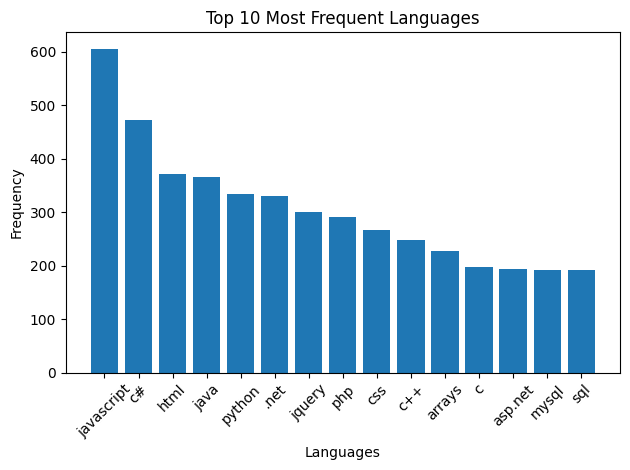

In [ ]:
import matplotlib.pyplot as plt


all_languages = []
for languages_list in df['tags']:
    all_languages.extend(languages_list)

# Count language occurrences
language_frequencies = pd.Series(all_languages).value_counts()

# Select the top 10 most frequent languages
top_languages = language_frequencies.head(15)

# Plot the bar plot
plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df1.describe()

,preferred_tags1,preferred_tags2,preferred_tags3,tags
count,819,819,819,819
unique,123,179,266,669
top,c#,javascript,javascript,"[javascript, jquery, html]"
freq,123,76,49,14


In [ ]:

all_tags = []

# Iterate through the 'tags' column and extract tags
for tags_list in df1['tags']:
    all_tags.extend(tags_list)

# Count tag occurrences
tag_frequencies = Counter(all_tags)

# Get the top most frequent tags
top_tags = tag_frequencies.most_common(2457)  # Change 10 to the desired number

print("Top most frequent tags:")
i = 1
for tag, count in top_tags:
    print(f"{i} tags= {tag}: =========== {count} ")
    i += 1

Top most frequent tags:
1 tags= javascript: =========== 213 
2 tags= c#: =========== 179 
3 tags= java: =========== 132 
4 tags= python: =========== 116 
5 tags= .net: =========== 98 
6 tags= php: =========== 91 
7 tags= c++: =========== 84 
8 tags= jquery: =========== 70 
9 tags= html: =========== 63 
10 tags= ios: =========== 50 
11 tags= objective-c: =========== 49 
12 tags= c: =========== 46 
13 tags= android: =========== 43 
14 tags= asp.net: =========== 37 
15 tags= sql: =========== 34 
16 tags= css: =========== 32 
17 tags= mysql: =========== 32 
18 tags= ruby: =========== 29 
19 tags= regex: =========== 26 
20 tags= git: =========== 26 
21 tags= swift: =========== 25 
22 tags= r: =========== 24 
23 tags= ruby-on-rails: =========== 24 
24 tags= iphone: =========== 24 
25 tags= arrays: =========== 20 
26 tags= node.js: =========== 20 
27 tags= c++11: =========== 19 
28 tags= sql-server: =========== 18 
29 tags= scala: =========== 18 
30 tags= asp.net-mvc: =========== 18 
31 tags=

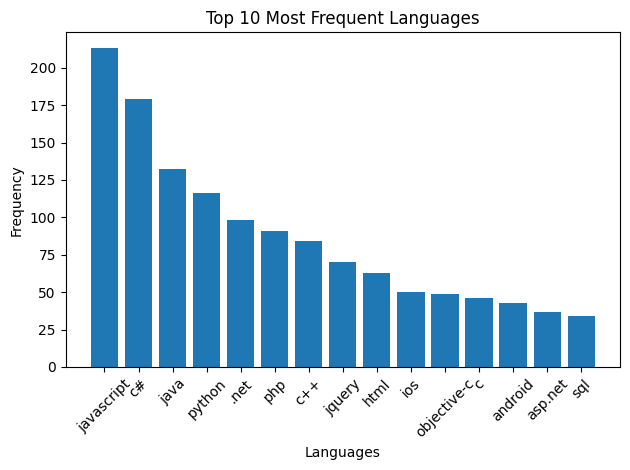

In [ ]:
import matplotlib.pyplot as plt


all_languages = []
for languages_list in df1['tags']:
    all_languages.extend(languages_list)

# Count language occurrences
language_frequencies = pd.Series(all_languages).value_counts()

# Select the top 10 most frequent languages
top_languages = language_frequencies.head(15)

# Plot the bar plot
plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
from sklearn.preprocessing import MultiLabelBinarizer

# Sample preferred languages
preferred_languages = [['Python','.net','c#', 'JavaScript'], ['JavaScript'], ['Python', 'C++']]

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform preferred languages
binary_matrix = mlb.fit_transform(preferred_languages)

# Print the binary matrix
print(binary_matrix)

[[1 0 1 1 1]
 [0 0 1 0 0]
 [0 1 0 1 0]]


In [4]:
import pandas as pd
from sklearn.datasets import make_multilabel_classification

# Generate multilabel classification data
X, y = make_multilabel_classification(n_samples=100, n_classes=3, n_labels=2, random_state=42)

# Create a DataFrame to display the data
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
labels = pd.DataFrame(y, columns=[f'Label_{i+1}' for i in range(y.shape[1])])

# Concatenate data and labels along columns
df = pd.concat([data, labels], axis=1)

# Display the first few rows of the DataFrame
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Label_1,Label_2,Label_3
0,1.0,8.0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,1.0,...,3.0,2.0,2.0,6.0,3.0,0.0,1.0,0,1,0
1,5.0,4.0,2.0,0.0,3.0,2.0,3.0,1.0,3.0,2.0,...,0.0,1.0,0.0,6.0,0.0,2.0,4.0,0,0,0
2,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,...,0.0,5.0,2.0,8.0,2.0,3.0,4.0,1,1,1
3,0.0,3.0,0.0,0.0,2.0,3.0,2.0,6.0,3.0,1.0,...,4.0,1.0,1.0,3.0,4.0,1.0,3.0,1,1,0
4,1.0,8.0,0.0,2.0,1.0,3.0,2.0,5.0,3.0,2.0,...,4.0,3.0,0.0,4.0,2.0,1.0,2.0,0,1,0


In [5]:
data = {'tags': ['tag1', 'tag2', 'tag3', 'tag4', 'tag5']}
df = pd.DataFrame(data)

# List of values to match
match_list = ['tag2', 'tag4', 'tag6']

# Replace tags not in match_list with 0
df['tags'] = df['tags'].apply(lambda x: x if x in match_list else '0')

In [6]:
df['tags']

0       0
1    tag2
2       0
3    tag4
4       0
Name: tags, dtype: object

In [8]:
import pandas as pd

# Sample DataFrame
data = {'tags': ['python, data science', 'machine learning, python', 'data analysis', 'java, programming']}
df = pd.DataFrame(data)

# List of tags to match against
tag_list = ['python', 'machine learning', 'data analysis']

# Function to find matched tags
def find_matched_tags(row):
    matched_tags = [tag for tag in tag_list if tag in row['tags']]
    if matched_tags:
        return ', '.join(matched_tags)
    else:
        return 0

# Apply the function to create the 'target_column'
df['target_column'] = df.apply(find_matched_tags, axis=1)

# Display the updated DataFrame
print(df)

                       tags             target_column
0      python, data science                    python
1  machine learning, python  python, machine learning
2             data analysis             data analysis
3         java, programming                         0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Sample target column with categorical values
target_column = ['Category A', 'Category B', 'Category A', 'Category C']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
encoded_target = label_encoder.fit_transform(target_column)

# Now, `encoded_target` contains numerical values
print(encoded_target)

[0 1 0 2]


In [13]:
import pandas as pd

# Sample DataFrame
data = {
    'tags1': ['python', 'machine learning', 'data analysis'],
    'tags2': ['data science', 'python', 'programming'],
    'tags3': ['deep learning', 'java', 'data analysis']
}

df = pd.DataFrame(data)

# List of tags to match against
tag_list = ['python', 'machine learning', 'data analysis']

# Function to find matched tags
def find_matched_tags(row):
    matched_tags = []
    for col in df.columns:
        tags = row[col].split(', ')
        matched_tags.extend([tag for tag in tags if tag in tag_list])
    if matched_tags:
        return ', '.join(matched_tags)
    else:
        return '0'

# Apply the function to create the 'target_column'
df['target_column'] = df.apply(find_matched_tags, axis=1)

# Display the updated DataFrame
df

,tags1,tags2,tags3,target_column
0,python,data science,deep learning,python
1,machine learning,python,java,"machine learning, python"
2,data analysis,programming,data analysis,"data analysis, data analysis"


In [16]:
import pandas as pd

# Sample DataFrame
data = {
    'tags1': ['programming, python, data analysis'],
    'tags2': ['data science, java, programming'],
    'tags3': ['machine learning, python, data engineering'],
}

df = pd.DataFrame(data)

# Function to keep only the first tag
def keep_first_tag(row):
    for col in df.columns:
        tags = row[col].split(', ')
        if len(tags) > 1:
            row[col] = tags[0]
    return row

# Apply the function to each row
df = df.apply(keep_first_tag, axis=1)

# Display the updated DataFrame
print(df)

         tags1         tags2             tags3
0  programming  data science  machine learning


In [19]:
import pandas as pd

# Sample DataFrame with a 'tags' column
data = {'tags': ['python, data science, programming', 'java, programming, web development']}
df = pd.DataFrame(data)

# Define a mapping of old tags to new tags
tag_mapping = {
    'python': 'Python',
    'java': 'Java'


}

# Function to rename tags
def rename_tags(row):
    tags = row['tags'].split(', ')
    renamed_tags = [tag_mapping.get(tag, tag) for tag in tags]
    return ', '.join(renamed_tags)

# Apply the function to create the 'renamed_tags' column
df['tags'] = df.apply(rename_tags, axis=1)

# Display the updated DataFrame
print(df)

                                 tags
0   Python, data science, programming
1  Java, programming, web development
